In [25]:
%matplotlib inline
import numpy as np
from scipy import constants as con
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from math import e

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Below is the raw data from one low cut-off frequency filter plotted on two different scales

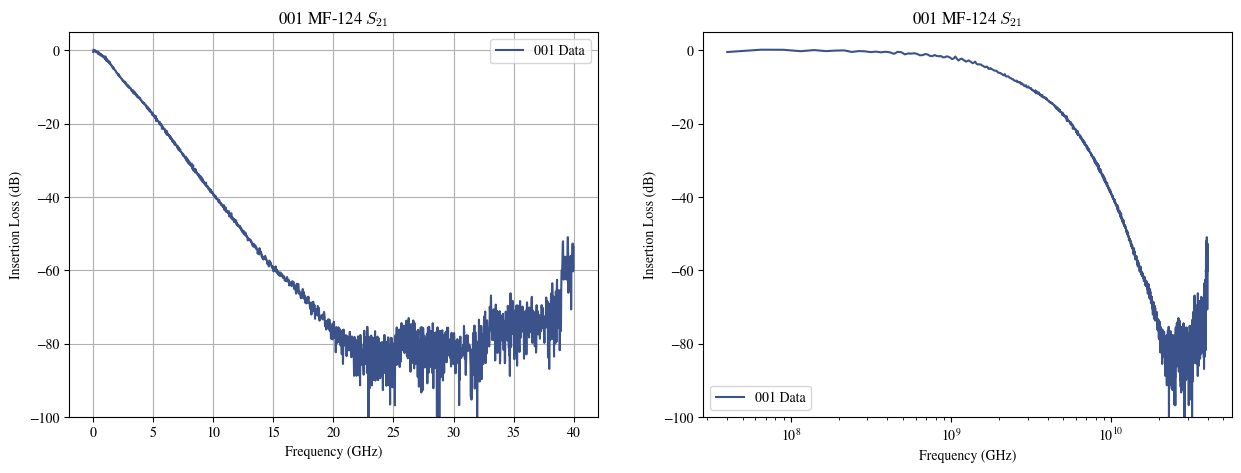

In [26]:
# Experimental Data
C21 = np.loadtxt('C2Data/1', delimiter='\t')

xC21 = (C21[:,0])
yC21 = (C21[:,1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
ax1.plot(xC21/1e9, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax1.ticklabel_format(useOffset=True)
ax1.legend(loc='upper right')
ax1.set_title("001 MF-124 $S_{21}$")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Insertion Loss (dB)")
ax1.set_ylim(-100, 5)
ax1.grid(which='both');

# log scale
ax2.plot(xC21, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax2.ticklabel_format(useOffset=False)
ax2.legend(loc='lower left')
ax2.set_title("001 MF-124 $S_{21}$")
ax2.set_xlabel("Frequency (GHz)")
ax2.set_xscale('log')
ax2.set_ylabel("Insertion Loss (dB)")
ax2.set_ylim(-100, 5);


## Laird Formulation ##

**Attenuation in dB/cm**

The following equation may be used to calculate the attenuation constant for any material in terms of its dielectric and magnetic properties:

$$     \frac{\text{dB}}{\text{cm}} = \left(\frac{2 \pi (8.686)}
    {\lambda_0}\right)\sqrt{\frac{\text{K}^{'}\text{M}^{'}}{2}\left[\sqrt{\left(1 + \tan^2\delta_d\right)\left(1 + \tan^2\delta_m\right)} - \left(1 - \tan\delta_d\tan\delta_m\right)\right]} $$

Where $\lambda_0 = c/f$

This is a glorified "plug and chug:" values from data sheet plugged into a given formula.


In [4]:
# Frequency values (Hz)
freq = np.array([0.1e9, 1e9, 3e9, 6e9, 9e9, 12e9, 15e9, 18e9])
omega = 2 * np.pi * freq

# Material properties for MF-124
epsilon_real = np.array([21.6, 20, 19.1, 18.9, 18.9, 18.9, 18.9, 18.9])  # K'
epsilon_imag = np.array([0.3, 1.3, 0.7, 0.5, 0.4, 0.4, 0.4, 0.4])        # K''
loss_tangent_d = np.array([0, 0.1, 0, 0, 0, 0, 0, 0])                    # tanδ_d
mu_real = np.array([5.6, 5.4, 4, 2.5, 1.8, 1.5, 1.3, 1.2])               # M'
mu_imag = np.array([0.1, 1, 2.2, 2.2, 1.7, 1.4, 1.2, 1])                 # M''
loss_tangent_m = np.array([0, 0.2, 0.6, 0.9, 0.9, 0.9, 0.9, 0.8])        # tanδ_m

A = (2*np.pi*freq)/(con.c)
B = ((epsilon_real * mu_real) / 2)
C = np.sqrt((1 + (loss_tangent_d)**2) * (1 + (loss_tangent_m)**2))
D = (1 - loss_tangent_d * loss_tangent_m)

dBcm = (A * np.sqrt(B * (C - D)))*8.686 / 100

#print('Laird MF-124')
#for i, value in enumerate(dBcm):
#    print(f"Frequency {freq[i]/1e9} GHz: dBcm = {value:.4f} dB/cm")

Below we will use: 
$$\tan\delta_d=\frac{\epsilon^{''}}{\epsilon^{'}}$$
and
$$\tan\delta_m=\frac{\mu^{''}}{\mu^{'}}$$

In [5]:
A2 = (2*np.pi*freq)/(con.c)
B2 = ((epsilon_real * mu_real) / 2)
C2 = np.sqrt((1 + (epsilon_imag / epsilon_real)**2) * (1 + (mu_imag / mu_real)**2))
D2 = (1 - (epsilon_imag / epsilon_real) * (mu_imag / mu_real))

dBcm_loss_tan_ratio = (A * np.sqrt(B * (C - D)))*8.686 / 100

#print('Laird MF-124')
#for i, value in enumerate(dBcm_loss_tan_ratio):
#    print(f"Frequency {freq[i]/1e9} GHz: dBcm = {value:.4f} dB/cm")

## Pozar Formulation
The transmission line parameters of a coaxial line with complex permittivity ($\epsilon = \epsilon_0\epsilon_r$) and complex permeability ($\mu = \mu_0\mu_r$) are given by:
\begin{align}
    R &= \frac{R_{s}}{2\pi}\left(\frac{1}{a} + \frac{1}{b}\right)\\ \\
    L &= \frac{\mu}{2\pi} \ln\left(\frac{b}{a}\right)\\ \\
    G &= \frac{2\pi\omega\epsilon''}{\ln\left(\frac{b}{a}\right)}\\ \\
    C &= \frac{2\pi\epsilon'}{\ln\left(\frac{b}{a}\right)}
\end{align}
Where:
\begin{align*}
    R_s &= \frac{1}{\sigma \delta_{s}}
\end{align*}
is the surface resistance of the conductors.

For a lossy line, the complex propagation constant $\gamma$ is a function of frequency and is given by:
\begin{equation}
    \gamma = \alpha + i\beta = \sqrt{(R + i\omega L)(G + i\omega C)}
\end{equation}
Where attenuation along the transmission is given by:
\begin{equation}
    Re|\gamma| = \alpha = \sqrt{\frac{(RG + \omega^2 LC) + \sqrt{(RG - \omega^2)^2 + \omega^2(RC + GL)^2}}{2}}
\end{equation}
The wave equation for $V(z)$ is given by:
\begin{equation}
    \frac{d^2 V(z)}{dz^2} - \gamma^2V(z) = 0
\end{equation}
When phase constant $\beta = 0$ the solution for any length $z$:
\begin{equation}
    V(z) = V_{0}^{+}e^{-\alpha z}
\end{equation}
Transmission coefficients across two different ports and are given by:
\begin{equation*}
    S_{ij} = \frac{V_{i}(z)}{V_{j}(z)}
\end{equation*}
These transmission coefficients can be thought of as attenuations for signals traveling from port $i$ to port $j$ through:
\begin{equation*}
    \frac{\text{dB}}{\text{cm}} = -20\log_{10}\left(|S_{ij}|\right)
\end{equation*}

In [19]:
# Constants
mu_0 = con.mu_0            # Permeability of free space (H/m)
epsilon_0 = con.epsilon_0  # Permittivity of free space (F/m)
sigma_Cu = 5.813e7         # Conductivity of copper (S/m)

# Given discrete frequency values (Hz)
freq = np.array([0.1e9, 1e9, 3e9, 6e9, 9e9, 12e9, 15e9, 18e9])  # Hz
omega = 2 * np.pi * freq  # Angular frequency (rad/s)

# Corresponding material properties
# !!! FOR MF-124 !!!
epsilon_real = np.array([21.6, 20, 19.1, 18.9, 18.9, 18.9, 18.9, 18.9]) # K'      Real part of permittivity (dielectric constant)
loss_tangent_d = np.array([0, 0.1, 0, 0, 0, 0, 0, 0])                   # tanδ_d  Dielectric loss tangent
epsilon_imag = np.array([0.3, 1.3, 0.7, 0.5, 0.4, 0.4, 0.4, 0.4])       # K''     Imaginary part of permittivity (loss)
epsilon_complex = epsilon_real * (1 - 1j * loss_tangent_d)
epsilon = epsilon_0 * epsilon_complex
    
mu_real = np.array([5.6, 5.4, 4, 2.5, 1.8, 1.5, 1.3, 1.2])              # M'      Real part of magnetic permeability 
loss_tangent_m = np.array([0, 0.2, 0.6, 0.9, 0.9, 0.9, 0.9, 0.8])       # tanδ_m  Magnetic loss tangent 
mu_imag = np.array([0.1, 1, 2.2, 2.2, 1.7, 1.4, 1.2, 1])                # M''     Imaginary part of magnetic permeability (loss)
mu_complex = mu_real * (1 - 1j * loss_tangent_m) 
mu = mu_0 * mu_complex                                                  # Absolute permeability

# Geometry
a_2 = 0.92e-3  # Inner radius of Eccosorb MF core (also the outer radius of the pin!) (m)
b_2 = 4.75e-3  # Outer radius of Eccosorb MF core (m)
z = 9.74e-3     # Length of Eccosorb (m)


# L, C, G calculations
L = (mu / (2 * np.pi)) * np.log(b_2 / a_2)          # Inductance of conductor (pin) (H/m)
C = (2 * np.pi * epsilon.real) / np.log(b_2 / a_2)  # Capacitance of dielectric (Ecco) (F/m)
G = (omega * (epsilon).imag) / np.log(b_2 / a_2)    # Conductance of dielectric (Ecco) (S/m)

# Surface resistance & R calculation
delta_s = np.sqrt(2 / (omega * mu_0 * sigma_Cu))
R_s = 1 / (sigma_Cu * delta_s)                 # Surface resistance of conductor (pin) (Ω)
R = (R_s / (2 * np.pi)) * (1 / a_2 + 1 / b_2)  # Resistance of conductor (pin) (Ω/m)

# Complex propagation constant for lossy transmission line
gamma_lossy = np.sqrt((R + 1j * omega * L) * (G + 1j * omega * C))

# Attenuation constant
alpha = np.real(gamma_lossy)  # Attenuation constant (Np/m)

# Voltage attenuation
V_0 = 1  # Initial amplitude (applied voltage)
V_in = V_0 * np.exp(-alpha * 0)  # V_2
V_out = V_0 * np.exp(-alpha * z) # V_1

# Convert attenuation to dB
attenuation_dB = -(20 * np.log10(V_out)) # S_21 = (V_2 / V_1) = V_2 (because V_1=1) = V_out
attenuation_dB_cm = attenuation_dB / (z * 100)

#print('Pozar MF-124')
#for i, value in enumerate(attenuation_dB_cm):
#    print(f"Frequency {freq[i]/1e9} GHz: dBcm = {value:.4f} dB/cm")

## Comparison

In [20]:
dB_per_cm = np.array([0.1, 2.5, 13.6, 31.1, 43.5, 51.9, 57.9, 62.2])

print(f"{'Frequency (GHz)':<15} {'Laird dB/cm':<15} {'Pozar dB/cm':<15} {'Data Sheet dB/cm':<15}")
print("-" * 65)
for i in range(len(freq)):
    f_GHz = freq[i] / 1e9
    laird_val = dBcm[i]
    laird_val_loss_ratio = dBcm_loss_tan_ratio[i]
    pozar_val = attenuation_dB_cm[i]
    data_sheet_val = dB_per_cm[i]
    print(f"{f_GHz:<15.2f} {laird_val:<15.4f} {pozar_val:<15.4f} {data_sheet_val:<15.1f}")


Frequency (GHz) Laird dB/cm     Pozar dB/cm     Data Sheet dB/cm
-----------------------------------------------------------------
0.10            0.0000          0.0005          0.1            
1.00            2.8343          1.7327          2.5            
3.00            13.7605         13.7629         13.6           
6.00            31.1999         31.2036         31.1           
9.00            39.7110         39.7164         43.5           
12.00           48.3347         48.3415         51.9           
15.00           56.2465         56.2547         57.9           
18.00           58.4549         58.4647         62.2           


## Plot

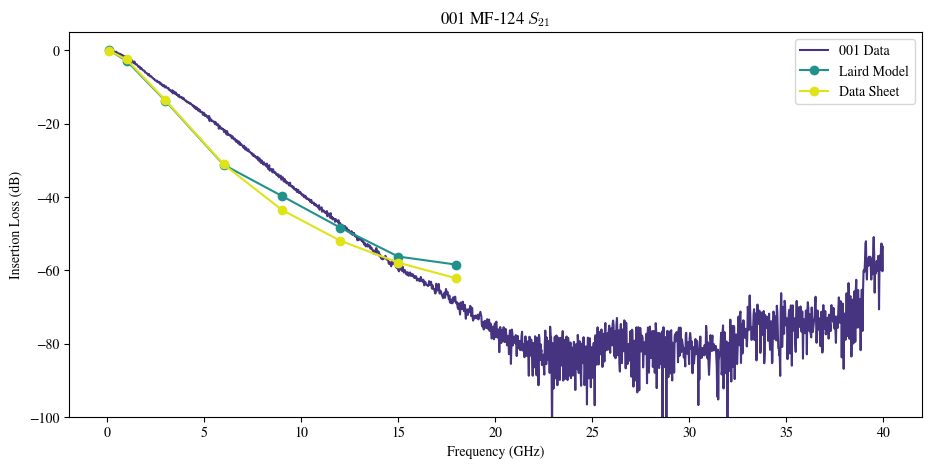

In [21]:
fig, (ax1) = plt.subplots(1, figsize=(11, 5))

# Linear scale
ax1.plot(xC21/1e9, yC21, label='001 Data', color=plt.cm.viridis(0.15))
ax1.plot(freq/1e9, -dBcm, marker='o', linestyle='-', label='Laird Model', color=plt.cm.viridis(0.5))
ax1.ticklabel_format(useOffset=True)
ax1.legend(loc='upper right')
ax1.set_title("Laird MF-124 Model vs. 001 $S_{21}$")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Insertion Loss (dB)")
ax1.set_ylim(-100, 5)
ax1.grid(which='both');

# Target frequencies (Hz)
target_freq = np.array([0.1e9, 1e9, 3e9, 6e9, 9e9, 12e9, 15e9, 18e9])

# Data sheet dB/cm
dB_per_cm = np.array([0.1, 2.5, 13.6, 31.1, 43.5, 51.9, 57.9, 62.2])

# Experimental Data
C21 = np.loadtxt('C2Data/1', delimiter='\t')

xC21 = (C21[:,0])
yC21 = (C21[:,1])

ax1.plot(target_freq/1e9, -dB_per_cm, marker='o', linestyle='-', label='Data Sheet', color=plt.cm.viridis(0.95))
ax1.ticklabel_format(useOffset=True)
ax1.legend(loc='upper right')
ax1.set_title("001 MF-124 $S_{21}$")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Insertion Loss (dB)")
#ax1.set_ylim(-100, 5)
ax1.grid(which='both');

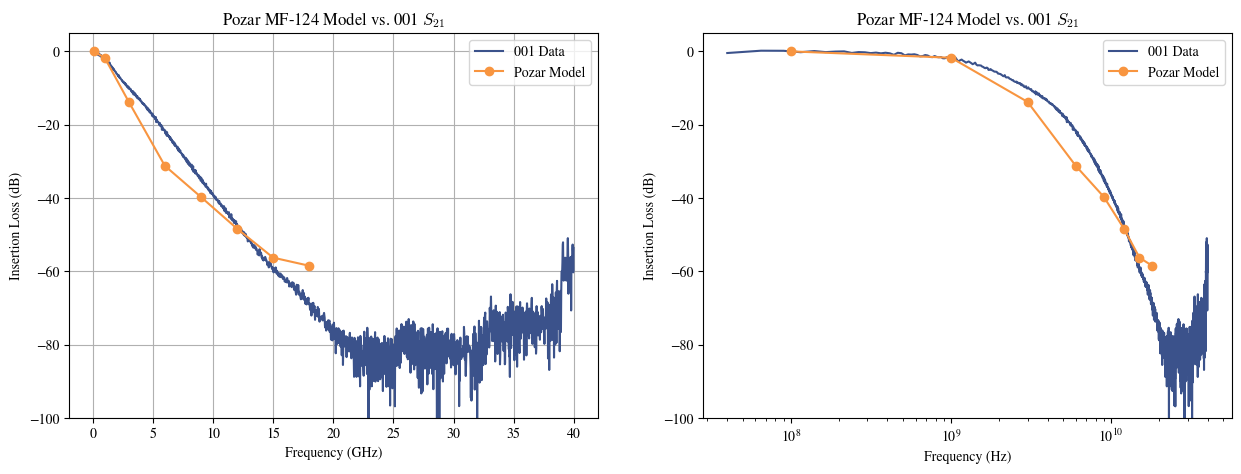

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
ax1.plot(xC21/1e9, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax1.plot(freq/1e9, -attenuation_dB_cm, marker='o', linestyle='-', label='Pozar Model', color=plt.cm.plasma(0.75))
ax1.ticklabel_format(useOffset=True)
ax1.legend(loc='upper right')
ax1.set_title("Pozar MF-124 Model vs. 001 $S_{21}$")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Insertion Loss (dB)")
ax1.set_ylim(-100, 5)
ax1.grid(which='both');

# log scale
ax2.plot(xC21, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax2.plot(freq, -attenuation_dB_cm, marker='o', linestyle='-', label='Pozar Model', color=plt.cm.plasma(0.75))
ax2.ticklabel_format(useOffset=False)
ax2.legend(loc='upper right')
ax2.set_title("Pozar MF-124 Model vs. 001 $S_{21}$")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_xscale('log')
ax2.set_ylabel("Insertion Loss (dB)")
ax2.set_ylim(-100, 5);

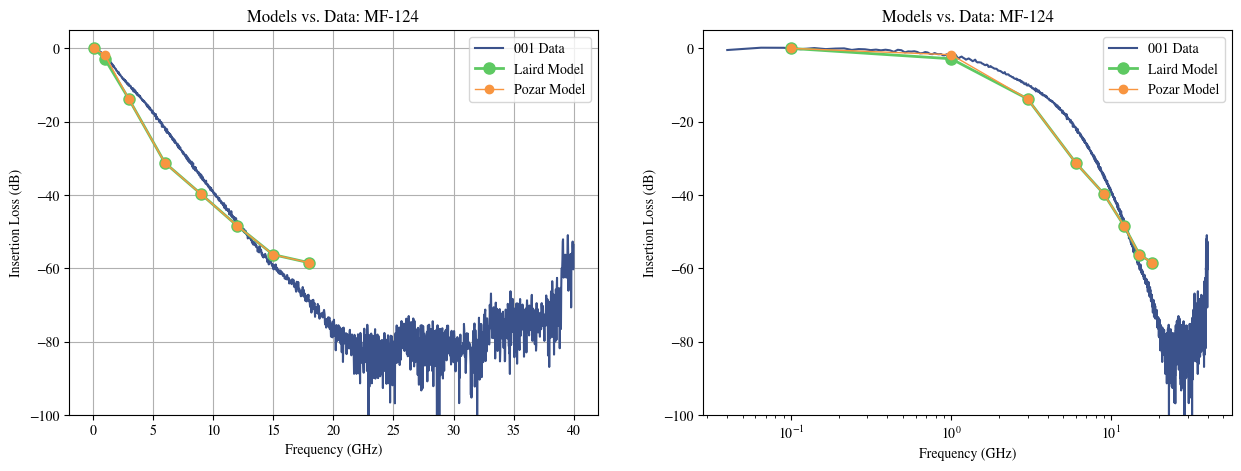

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
ax1.plot(xC21/1e9, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax1.plot(freq/1e9, -dBcm, marker='o', markersize=8, linestyle='-', linewidth=2, label='Laird Model', color=plt.cm.viridis(0.75))
ax1.plot(freq/1e9, -attenuation_dB_cm, marker='o', markersize=6, linestyle='-', linewidth=1, label='Pozar Model', color=plt.cm.plasma(0.75))
ax1.ticklabel_format(useOffset=True)
ax1.legend(loc='upper right')
ax1.set_title("Models vs. Data: MF-124")
ax1.set_xlabel("Frequency (GHz)")
ax1.set_ylabel("Insertion Loss (dB)")
ax1.set_ylim(-100, 5)
ax1.grid(which='both');

# log scale
ax2.plot(xC21/1e9, yC21, label='001 Data', color=plt.cm.viridis(0.25))
ax2.plot(freq/1e9, -dBcm, marker='o', markersize=8, linestyle='-', linewidth=2, label='Laird Model', color=plt.cm.viridis(0.75))
ax2.plot(freq/1e9, -attenuation_dB_cm, marker='o', markersize=6, linestyle='-', linewidth=1, label='Pozar Model', color=plt.cm.plasma(0.75))
ax2.ticklabel_format(useOffset=False)
ax2.legend(loc='upper right')
ax2.set_title("Models vs. Data: MF-124")
ax2.set_xlabel("Frequency (GHz)")
ax2.set_xscale('log')
ax2.set_ylabel("Insertion Loss (dB)")
ax2.set_ylim(-100, 5);